In [167]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as tf
import random

tf.disable_v2_behavior()
print("Num GPUs Available: ", tf.test.is_built_with_cuda())

path="../../data"
IMG_SIZE=100

Num GPUs Available:  False


In [168]:
dog_files=os.listdir(path+'/dogs')
wolf_files=os.listdir(path+'/wolves')
image_paths = []
#label: 0 for dog ,1 for wolf # woof -woof
labels=[]
img=[]
for file in dog_files:
    image = cv2.imread(path+'/'+'dogs/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
    #Creating and saving each image in the form of numerical data in an array
    img.append(norm_image.flatten())
    labels.append([1,0])
    image_paths.append(path+'/'+'dogs/'+file)
for file in wolf_files:
    image = cv2.imread(path+'/'+'wolves/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
          #Creating and saving each image in the form of numerical data in an array
    image_paths.append(path+'/'+'wolves/'+file)

    img.append(norm_image.flatten())
    labels.append([0,1])

[1, 0]


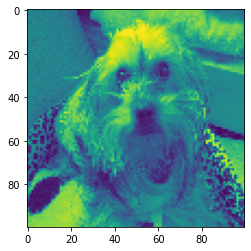

In [169]:
df={'data':img,'label':labels}
df=pd.DataFrame(df)
df = df.sample(frac=1).reset_index(drop=True)

plt.imshow(df.data[0].reshape(IMG_SIZE,IMG_SIZE))
print(df.label[1])
#main_train_df,test_df=train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
#train_df,val_df=train_test_split(main_train_df, test_size=0.1,shuffle=True,random_state=42)
#random.shuffle(df)
train_df=df[:1400]
val_df=df[1400:1600]
test_df=df[1600:]


In [170]:
x_train=list(train_df.data)
y_train=list(train_df.label)
x_val=list(val_df.data)
y_val=list(val_df.label)
x_test=list(test_df.data)
y_test=list(test_df.label)


In [176]:
(hidden_layer_1,hidden_layer_2,hidden_layer_3,hidden_layer_4) = (100,100,30,10)
x =tf.placeholder(tf.float32,[None,IMG_SIZE*IMG_SIZE])
y_ = tf.placeholder(tf.float32,[None,2])
W1 = tf.Variable(tf.truncated_normal([IMG_SIZE*IMG_SIZE, hidden_layer_1], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_1]))
z1 = tf.nn.leaky_relu(tf.matmul(x,W1)+b1)
W2 = tf.Variable(tf.truncated_normal([hidden_layer_1, hidden_layer_2], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_2]))
z2 = tf.nn.leaky_relu(tf.matmul(z1,W2)+b2)
W3 = tf.Variable(tf.truncated_normal([hidden_layer_2, hidden_layer_3], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_3]))
z3 = tf.nn.leaky_relu(tf.matmul(z2,W3)+b3)
W4 = tf.Variable(tf.truncated_normal([hidden_layer_3, hidden_layer_4], stddev=0.1))
b4 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_4]))
z4 = tf.nn.leaky_relu(tf.matmul(z3,W4)+b4)
W5 = tf.Variable(tf.truncated_normal([hidden_layer_4, 2], stddev=0.1))
b5 = tf.Variable(tf.constant(0.1, shape=[2]))

In [233]:

alpha = 0.0000005
pred =tf.matmul(z4, W5) + b5
loss1=tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=pred)
regularizers = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2)+ tf.nn.l2_loss(W3)+tf.nn.l2_loss(W4)+tf.nn.l2_loss(W5)
loss = tf.reduce_mean(loss1 + 0.000001 * regularizers)
# train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
train_step = tf.train.AdamOptimizer(alpha).minimize(loss)
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [244]:
train_loss=[]
test_loss=[]
train_acc=[]
test_acc=[]
max_acc = 0

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,15000):
    sess.run([train_step],feed_dict={x:x_train,y_:y_train})
    if i%100==0 and i!=0:
        tr_acc,tr_los = sess.run([accuracy,loss], feed_dict={x:x_train,y_:y_train})
        val_acc,val_los = sess.run([accuracy,loss], feed_dict={x:x_val,y_:y_val})
        train_loss.append(tr_los)
        train_acc.append(tr_acc)
        test_loss.append(val_los)
        test_acc.append(val_acc)
        if(max_acc<val_acc):
            max_acc = val_acc
        print (" Training accuracy: %.10f, Training loss: %.10f" % (tr_acc, tr_los))
        print (" Val accuracy: %.10f, Val loss: %.10f" % (val_acc, val_los))
        if i!=100:
            if test_loss[int(i/100)-2]<test_loss[int(i/100)-1] and max_acc-val_acc>0.02:
                print("-------------------break-------------------")
                break
        


 Training accuracy: 0.5471428633, Training loss: 0.6969233155
 Val accuracy: 0.5649999976, Val loss: 0.6961595416
 Training accuracy: 0.5557143092, Training loss: 0.6966227889
 Val accuracy: 0.5799999833, Val loss: 0.6957643032
 Training accuracy: 0.5557143092, Training loss: 0.6963274479
 Val accuracy: 0.5849999785, Val loss: 0.6953762174
 Training accuracy: 0.5642856956, Training loss: 0.6960277557
 Val accuracy: 0.5899999738, Val loss: 0.6949748397
 Training accuracy: 0.5707142949, Training loss: 0.6957239509
 Val accuracy: 0.5899999738, Val loss: 0.6945542693
 Training accuracy: 0.5728571415, Training loss: 0.6954185963
 Val accuracy: 0.6000000238, Val loss: 0.6941198707
 Training accuracy: 0.5907142758, Training loss: 0.6950741410
 Val accuracy: 0.6349999905, Val loss: 0.6936122179
 Training accuracy: 0.5928571224, Training loss: 0.6947552562
 Val accuracy: 0.6399999857, Val loss: 0.6931636333
 Training accuracy: 0.5928571224, Training loss: 0.6944496632
 Val accuracy: 0.639999985

KeyboardInterrupt: 

In [245]:
test_losses,test_accuracy=sess.run([loss,accuracy], feed_dict={x:x_test,y_:y_test})
print(f"Test Loss: {test_losses}, Test Accuracy: {test_accuracy}")

Test Loss: 0.6879823207855225, Test Accuracy: 0.5724999904632568


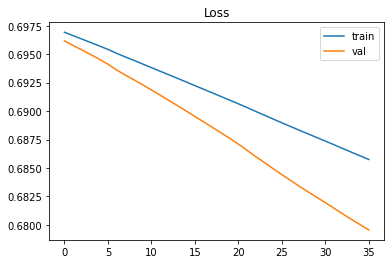

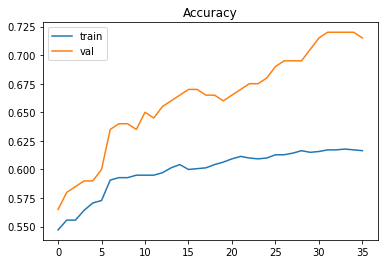

In [246]:

plt.plot(train_loss)
plt.plot(test_loss)
plt.title("Loss")
plt.legend(['train','val'])
plt.show()
plt.plot(train_acc)
plt.plot(test_acc)
plt.title("Accuracy")
plt.legend(['train','val'])
plt.show()